In [2]:
%matplotlib inline
import glob
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import imageio as im
from keras import models
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout,Input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras.applications import vgg16
import keras
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer, Activation,MaxPool2D 
import os
import cv2
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import tensorflow as tf
import shutil

In [215]:
for dir in os.walk('.')

<generator object walk at 0x00000243833F5DE0>

In [216]:
[i for i in os.listdir(path) if os.path.isdir(path+'/'+i)]

['514507',
 '514607',
 '515551',
 '521094',
 '522369',
 '542231',
 '542241',
 '542252',
 '543488',
 '543493']

In [104]:
"0 images classes are 72 out of 352"

'0 images classes are 72 out of 352'

In [184]:
y=[]

In [185]:
for i in os.listdir(r'C:/Users/kasandeep/Desktop/Projects_S/Vinod_Classification/GroupWise/'):
    #if len(os.listdir(r'C:/Users/kasandeep/Desktop/Projects_S/Vinod_Classification/GroupWise/'+i))==1:
        y.append(i)

In [186]:
len(y)

280

In [107]:
# for i in y:
#     os.rmdir(r'C:/Users/kasandeep/Desktop/Projects_S/Vinod_Classification/GroupWise/'+i)

# Image_Augmentation_GaussianNoise & SpeckleNoise

In [9]:
import numpy as np
import cv2
import random
import skimage 

class Data_augmentation:
    def __init__(self, path, image_name):
        self.path = path
        self.name = image_name
        print(path+image_name)
        self.image = cv2.imread(path+image_name)

    def rotate(self, image, angle=90, scale=1.0):
        w = image.shape[1]
        h = image.shape[0]
        #rotate matrix
        M = cv2.getRotationMatrix2D((w/2,h/2), angle, scale)
        #rotate
        image = cv2.warpAffine(image,M,(w,h))
        return image
    
    def rotate1(self, image, angle=180, scale=1.0):
        w = image.shape[1]
        h = image.shape[0]
        #rotate matrix
        M = cv2.getRotationMatrix2D((w/2,h/2), angle, scale)
        #rotate
        image = cv2.warpAffine(image,M,(w,h))
        return image
    
    def rotate2(self, image, angle=270, scale=1.0):
        w = image.shape[1]
        h = image.shape[0]
        #rotate matrix
        M = cv2.getRotationMatrix2D((w/2,h/2), angle, scale)
        #rotate
        image = cv2.warpAffine(image,M,(w,h))
        return image
    
    def rotate3(self, image, angle=30, scale=1.0):
        w = image.shape[1]
        h = image.shape[0]
        #rotate matrix
        M = cv2.getRotationMatrix2D((w/2,h/2), angle, scale)
        #rotate
        image = cv2.warpAffine(image,M,(w,h))
        return image

    def rotate4(self, image, angle=60, scale=1.0):
        w = image.shape[1]
        h = image.shape[0]
        #rotate matrix
        M = cv2.getRotationMatrix2D((w/2,h/2), angle, scale)
        #rotate
        image = cv2.warpAffine(image,M,(w,h))
        return image

    def rotate5(self, image, angle=120, scale=1.0):
        w = image.shape[1]
        h = image.shape[0]
        #rotate matrix
        M = cv2.getRotationMatrix2D((w/2,h/2), angle, scale)
        #rotate
        image = cv2.warpAffine(image,M,(w,h))
        return image

    def flip(self, image, vflip=False, hflip=False):
        if hflip or vflip:
            if hflip and vflip:
                c = -1
            else:
                c = 0 if vflip else 1
            image = cv2.flip(image, flipCode=c)
        return image 
    
    def add_GaussianNoise(self,image):
        gauss = np.random.normal(0,1,image.size)
        gauss = gauss.reshape(image.shape[0],image.shape[1],image.shape[2]).astype('uint8')
        # Add the Gaussian noise to the image
        img_gauss = cv2.add(image,gauss)
        return img_gauss
    
    def add_SpeckleNoise(self,image):
        gauss = np.random.normal(0,1,image.size)
        gauss = gauss.reshape(image.shape[0],image.shape[1],image.shape[2]).astype('uint8')
        # Add the Gaussian noise to the image
        img_gauss = image + image * gauss
        return img_gauss
    
    def image_augment(self, save_path):
        try:
            img = self.image.copy()
            img_flip = self.flip(img, vflip=True, hflip=False)
            img_rot = self.rotate(img)
            img_rot1 = self.rotate1(img)
            img_rot2 = self.rotate2(img)
            img_rot3 = self.rotate3(img)
            img_rot4 = self.rotate4(img)
            img_rot5 = self.rotate5(img)
            img_gaussian = self.add_GaussianNoise(img)
            img_gaussian1 = self.add_SpeckleNoise(img)

            name_int = self.name[:len(self.name)-4]
            cv2.imwrite(save_path+'%s' %str(name_int)+'_vflip.jpg', img_flip)
            cv2.imwrite(save_path+'%s' %str(name_int)+'_rot90.jpg', img_rot)
            cv2.imwrite(save_path+'%s' %str(name_int)+'_rot180.jpg', img_rot1)
#             cv2.imwrite(save_path+'%s' %str(name_int)+'_rot270.jpg', img_rot2)
#             cv2.imwrite(save_path+'%s' %str(name_int)+'_rot30.jpg', img_rot3)
#             cv2.imwrite(save_path+'%s' %str(name_int)+'_rot60.jpg', img_rot4)
#             cv2.imwrite(save_path+'%s' %str(name_int)+'_rot120.jpg', img_rot5)
            cv2.imwrite(save_path+'%s' %str(name_int)+'_GaussianNoise.jpg', img_gaussian)
            cv2.imwrite(save_path+'%s' %str(name_int)+'_SpeckleNoise.jpg', img_gaussian1) 
        except:
            pass
    
    
    def main(file_dir,output_path):
        for root, _, files in os.walk(file_dir):
            print(root)
        for file in files:
            print(file)
            raw_image = Data_augmentation(root,file)
            raw_image.image_augment(output_path)



In [10]:
a=Data_augmentation

In [187]:
os.makedirs(r"C:\Users\kasandeep\Desktop\Projects_S\Vinod_Classification\groups",mode=777)

In [188]:
from distutils.dir_util import copy_tree

In [216]:
import distutils.core
src=r"C:\Users\kasandeep\Desktop\Projects_S\Vinod_Classification\GroupWise/"
dst=r"C:\Users\kasandeep\Desktop\Projects_S\Vinod_Classification\groups"
import shutil
#distutils.dir_util.copy_tree(src+i,dst)
for i in y:
    distutils.dir_util.copy_tree(src+i,dst)

In [161]:
src+i

'C:\\Users\\kasandeep\\Desktop\\Projects_S\\Vinod_Classification\\GroupWise/973266'

In [191]:
#os.system('copy C:\\Users\\kasandeep\\Desktop\dummy C:\\Users\\kasandeep\\Desktop\\Projects_S\\Vinod_Classification ')

In [190]:
# src=r"C:\Users\kasandeep\Desktop\Projects_S\Vinod_Classification\GroupWise/"
# dst=r"C:\Users\kasandeep\Desktop\Projects_S\Vinod_Classification\1"
# import shutil
# for i in y:
#     os.system('copy '+src+" "+dst)

In [110]:
for i in y:
    path1=r"C:\Users\kasandeep\Desktop\Projects_S\Vinod_Classification\GroupWise/"+i+"/"
    path2=r"C:\Users\kasandeep\Desktop\Projects_S\Vinod_Classification\GroupWise/"+i+"/"
    print(path1,path2)

C:\Users\kasandeep\Desktop\Projects_S\Vinod_Classification\GroupWise/1057135/ C:\Users\kasandeep\Desktop\Projects_S\Vinod_Classification\GroupWise/1057135/
C:\Users\kasandeep\Desktop\Projects_S\Vinod_Classification\GroupWise/1096912/ C:\Users\kasandeep\Desktop\Projects_S\Vinod_Classification\GroupWise/1096912/
C:\Users\kasandeep\Desktop\Projects_S\Vinod_Classification\GroupWise/1125125/ C:\Users\kasandeep\Desktop\Projects_S\Vinod_Classification\GroupWise/1125125/
C:\Users\kasandeep\Desktop\Projects_S\Vinod_Classification\GroupWise/1147110/ C:\Users\kasandeep\Desktop\Projects_S\Vinod_Classification\GroupWise/1147110/
C:\Users\kasandeep\Desktop\Projects_S\Vinod_Classification\GroupWise/1181693/ C:\Users\kasandeep\Desktop\Projects_S\Vinod_Classification\GroupWise/1181693/
C:\Users\kasandeep\Desktop\Projects_S\Vinod_Classification\GroupWise/1187256/ C:\Users\kasandeep\Desktop\Projects_S\Vinod_Classification\GroupWise/1187256/
C:\Users\kasandeep\Desktop\Projects_S\Vinod_Classification\Group

In [213]:
path1=r"C:\Users\kasandeep\Desktop\Projects_S\Vinod_Classification\groups/"

In [4]:
path2=r"C:\Users\kasandeep\Desktop\Projects_S\Vinod_Classification\T3\G1/"

# Grouping the pictures from the subfolders  and applying augmentation

In [11]:
for i in os.listdir(path2):
    a.main(path2+i+'/', path2+i+'/')

C:\Users\kasandeep\Desktop\Projects_S\Vinod_Classification\T3\G1/514507/
10076671.jpg
C:\Users\kasandeep\Desktop\Projects_S\Vinod_Classification\T3\G1/514507/10076671.jpg
10265646.jpg
C:\Users\kasandeep\Desktop\Projects_S\Vinod_Classification\T3\G1/514507/10265646.jpg
116202.jpg
C:\Users\kasandeep\Desktop\Projects_S\Vinod_Classification\T3\G1/514507/116202.jpg
1278693.jpeg
C:\Users\kasandeep\Desktop\Projects_S\Vinod_Classification\T3\G1/514507/1278693.jpeg
1300331.jpg
C:\Users\kasandeep\Desktop\Projects_S\Vinod_Classification\T3\G1/514507/1300331.jpg
134817.jpg
C:\Users\kasandeep\Desktop\Projects_S\Vinod_Classification\T3\G1/514507/134817.jpg
1493015.jpg
C:\Users\kasandeep\Desktop\Projects_S\Vinod_Classification\T3\G1/514507/1493015.jpg
197037.jpeg
C:\Users\kasandeep\Desktop\Projects_S\Vinod_Classification\T3\G1/514507/197037.jpeg
1986649.jpg
C:\Users\kasandeep\Desktop\Projects_S\Vinod_Classification\T3\G1/514507/1986649.jpg
215283.jpg
C:\Users\kasandeep\Desktop\Projects_S\Vinod_Classi

1331157.jpg
C:\Users\kasandeep\Desktop\Projects_S\Vinod_Classification\T3\G1/542231/1331157.jpg
1602217.jpg
C:\Users\kasandeep\Desktop\Projects_S\Vinod_Classification\T3\G1/542231/1602217.jpg
1657875.jpg
C:\Users\kasandeep\Desktop\Projects_S\Vinod_Classification\T3\G1/542231/1657875.jpg
1750689.jpg
C:\Users\kasandeep\Desktop\Projects_S\Vinod_Classification\T3\G1/542231/1750689.jpg
1784265.jpg
C:\Users\kasandeep\Desktop\Projects_S\Vinod_Classification\T3\G1/542231/1784265.jpg
1843319.jpg
C:\Users\kasandeep\Desktop\Projects_S\Vinod_Classification\T3\G1/542231/1843319.jpg
57524.jpg
C:\Users\kasandeep\Desktop\Projects_S\Vinod_Classification\T3\G1/542231/57524.jpg
7560333.jpg
C:\Users\kasandeep\Desktop\Projects_S\Vinod_Classification\T3\G1/542231/7560333.jpg
8267857.jpg
C:\Users\kasandeep\Desktop\Projects_S\Vinod_Classification\T3\G1/542231/8267857.jpg
8555175.png
C:\Users\kasandeep\Desktop\Projects_S\Vinod_Classification\T3\G1/542231/8555175.png
9950705.jpg
C:\Users\kasandeep\Desktop\Proje

In [246]:
a.main(path1,path2)

C:\Users\kasandeep\Desktop\Projects_S\Vinod_Classification\groups/
C:\Users\kasandeep\Desktop\Projects_S\Vinod_Classification\groups/1005621.jpg
C:\Users\kasandeep\Desktop\Projects_S\Vinod_Classification\groups/1005640.jpg
C:\Users\kasandeep\Desktop\Projects_S\Vinod_Classification\groups/1005687.jpg
C:\Users\kasandeep\Desktop\Projects_S\Vinod_Classification\groups/1005729.jpg
C:\Users\kasandeep\Desktop\Projects_S\Vinod_Classification\groups/1005735.jpg
C:\Users\kasandeep\Desktop\Projects_S\Vinod_Classification\groups/1005741.jpg
C:\Users\kasandeep\Desktop\Projects_S\Vinod_Classification\groups/1005744.jpg
C:\Users\kasandeep\Desktop\Projects_S\Vinod_Classification\groups/1005853.jpg
C:\Users\kasandeep\Desktop\Projects_S\Vinod_Classification\groups/1005885.jpg
C:\Users\kasandeep\Desktop\Projects_S\Vinod_Classification\groups/10059040.jpeg
C:\Users\kasandeep\Desktop\Projects_S\Vinod_Classification\groups/10059174.jpeg
C:\Users\kasandeep\Desktop\Projects_S\Vinod_Classification\groups/10059

C:\Users\kasandeep\Desktop\Projects_S\Vinod_Classification\groups/1677260.jpg
C:\Users\kasandeep\Desktop\Projects_S\Vinod_Classification\groups/1677273.jpg
C:\Users\kasandeep\Desktop\Projects_S\Vinod_Classification\groups/170677.jpg
C:\Users\kasandeep\Desktop\Projects_S\Vinod_Classification\groups/1707642.jpg
C:\Users\kasandeep\Desktop\Projects_S\Vinod_Classification\groups/172048.jpg
C:\Users\kasandeep\Desktop\Projects_S\Vinod_Classification\groups/172375.jpg
C:\Users\kasandeep\Desktop\Projects_S\Vinod_Classification\groups/173488.jpg
C:\Users\kasandeep\Desktop\Projects_S\Vinod_Classification\groups/173536.jpg
C:\Users\kasandeep\Desktop\Projects_S\Vinod_Classification\groups/1736363.jpg
C:\Users\kasandeep\Desktop\Projects_S\Vinod_Classification\groups/1750623.jpg
C:\Users\kasandeep\Desktop\Projects_S\Vinod_Classification\groups/1750644.jpg
C:\Users\kasandeep\Desktop\Projects_S\Vinod_Classification\groups/175900.jpg
C:\Users\kasandeep\Desktop\Projects_S\Vinod_Classification\groups/1759

C:\Users\kasandeep\Desktop\Projects_S\Vinod_Classification\groups/220517.jpg
C:\Users\kasandeep\Desktop\Projects_S\Vinod_Classification\groups/222791.jpg
C:\Users\kasandeep\Desktop\Projects_S\Vinod_Classification\groups/223446.jpg
C:\Users\kasandeep\Desktop\Projects_S\Vinod_Classification\groups/223449.jpg
C:\Users\kasandeep\Desktop\Projects_S\Vinod_Classification\groups/223458.jpg
C:\Users\kasandeep\Desktop\Projects_S\Vinod_Classification\groups/223840.jpg
C:\Users\kasandeep\Desktop\Projects_S\Vinod_Classification\groups/223939.jpg
C:\Users\kasandeep\Desktop\Projects_S\Vinod_Classification\groups/223990.jpg
C:\Users\kasandeep\Desktop\Projects_S\Vinod_Classification\groups/224002.jpg
C:\Users\kasandeep\Desktop\Projects_S\Vinod_Classification\groups/224019.jpg
C:\Users\kasandeep\Desktop\Projects_S\Vinod_Classification\groups/224081.jpg
C:\Users\kasandeep\Desktop\Projects_S\Vinod_Classification\groups/224114.jpg
C:\Users\kasandeep\Desktop\Projects_S\Vinod_Classification\groups/224121.jpg

C:\Users\kasandeep\Desktop\Projects_S\Vinod_Classification\groups/6647264._GaussianNoise.jpg
C:\Users\kasandeep\Desktop\Projects_S\Vinod_Classification\groups/6647541.jpg
C:\Users\kasandeep\Desktop\Projects_S\Vinod_Classification\groups/6647749.jpg
C:\Users\kasandeep\Desktop\Projects_S\Vinod_Classification\groups/6686072.jpeg
C:\Users\kasandeep\Desktop\Projects_S\Vinod_Classification\groups/7013529.jpg
C:\Users\kasandeep\Desktop\Projects_S\Vinod_Classification\groups/7070318.jpg
C:\Users\kasandeep\Desktop\Projects_S\Vinod_Classification\groups/7482482.jpg
C:\Users\kasandeep\Desktop\Projects_S\Vinod_Classification\groups/7530972.jpg
C:\Users\kasandeep\Desktop\Projects_S\Vinod_Classification\groups/7531024.jpg
C:\Users\kasandeep\Desktop\Projects_S\Vinod_Classification\groups/7531059.jpg
C:\Users\kasandeep\Desktop\Projects_S\Vinod_Classification\groups/7531077.jpg
C:\Users\kasandeep\Desktop\Projects_S\Vinod_Classification\groups/7531087.jpg
C:\Users\kasandeep\Desktop\Projects_S\Vinod_Clas

C:\Users\kasandeep\Desktop\Projects_S\Vinod_Classification\groups/9279271.png
C:\Users\kasandeep\Desktop\Projects_S\Vinod_Classification\groups/9279276.png
C:\Users\kasandeep\Desktop\Projects_S\Vinod_Classification\groups/9279280.jpg
C:\Users\kasandeep\Desktop\Projects_S\Vinod_Classification\groups/9279282.png
C:\Users\kasandeep\Desktop\Projects_S\Vinod_Classification\groups/9279283.jpg
C:\Users\kasandeep\Desktop\Projects_S\Vinod_Classification\groups/9279296.jpg
C:\Users\kasandeep\Desktop\Projects_S\Vinod_Classification\groups/9279298.png
C:\Users\kasandeep\Desktop\Projects_S\Vinod_Classification\groups/9279871.jpg
C:\Users\kasandeep\Desktop\Projects_S\Vinod_Classification\groups/9279919.jpg
C:\Users\kasandeep\Desktop\Projects_S\Vinod_Classification\groups/9279920.png
C:\Users\kasandeep\Desktop\Projects_S\Vinod_Classification\groups/9279922.jpg
C:\Users\kasandeep\Desktop\Projects_S\Vinod_Classification\groups/9279923.jpg
C:\Users\kasandeep\Desktop\Projects_S\Vinod_Classification\group

# Reading Images from the folders

In [2]:
train_path=r'C:\Users\kasandeep\Desktop\Projects_S\Vinod_Classification\T3\G1'
image_size=128
classes=os.listdir(train_path)
def load_train(train_path, image_size, classes):
    images = []
    labels = []
    img_names = []
    field=[]
    indexes=[]
    print('Going to read training images')
    for fields in classes:   
        index = classes.index(fields)
        field.append(fields)
        indexes.append(index)
        print('Now going to read {} files (Index: {})'.format(fields, index))
        path = os.path.join(train_path, fields, '*g')
        files = glob.glob(path)
        for fl in files:
            try:
                image = cv2.imread(fl)
                image = cv2.resize(image, (image_size, image_size),0,0, cv2.INTER_LINEAR)
                image = image.astype(np.float32)
                #image = np.multiply(image, 1.0 / 255.0)
                images.append(image)
                label = np.zeros(len(classes))
                label[index] = 1.0
                labels.append(label)
                flbase = os.path.basename(fl)
                img_names.append(flbase)
            except:
                continue
    images = np.array(images)
    labels = np.array(labels)
    img_names = np.array(img_names)

    return images, labels, img_names,field,indexes
images, labels, img_names,field,indexes = load_train(train_path, image_size, classes)
images, labels, img_names = shuffle(images, labels, img_names) 
x_train,x_test,y_train,y_test=train_test_split(images,labels, test_size=0.33)
x_train = x_train.reshape(x_train.shape[0], 128, 128, 3)
x_test = x_test.reshape(x_test.shape[0], 128, 128, 3) 

Going to read training images
Now going to read 514507 files (Index: 0)
Now going to read 514607 files (Index: 1)
Now going to read 515551 files (Index: 2)
Now going to read 521094 files (Index: 3)
Now going to read 522369 files (Index: 4)
Now going to read 542231 files (Index: 5)
Now going to read 542241 files (Index: 6)
Now going to read 542252 files (Index: 7)
Now going to read 543488 files (Index: 8)
Now going to read 543493 files (Index: 9)


In [213]:
model.save('10_cnn.h5')

In [148]:
indexes

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [150]:
path2=r'C:\Users\kasandeep\Desktop\Projects_S\Vinod_Classification\T2\G1/'

In [207]:
directory_of_images = path2
image_type = 'g'

# Find all images
relative_image_directory = directory_of_images

all_imgs = [(relative_image_directory + x) for x in os.listdir(relative_image_directory) if image_type in x]
all_imgs.sort()

In [208]:
for i in set(field):
    os.makedirs(path2+str(i),exist_ok=True)

In [212]:
#clas=[]
for j in all_imgs:
        img = image.load_img(j, target_size=(128, 128))
        img = np.multiply(img, 1.0 / 255.0)
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        print(j)
        images = np.vstack([x])
        classes = model.predict_classes(images)
        #clas.append(classes)
        print(j, 'predicted_class is:',classes)
        for i in range(len(indexes)):
            if classes[0]==i:
                shutil.copy(j,path2+field[i])

C:\Users\kasandeep\Desktop\Projects_S\Vinod_Classification\T2\G1/10170259.jpg
C:\Users\kasandeep\Desktop\Projects_S\Vinod_Classification\T2\G1/10170259.jpg predicted_class is: [8]
C:\Users\kasandeep\Desktop\Projects_S\Vinod_Classification\T2\G1/10212643.jpg
C:\Users\kasandeep\Desktop\Projects_S\Vinod_Classification\T2\G1/10212643.jpg predicted_class is: [6]
C:\Users\kasandeep\Desktop\Projects_S\Vinod_Classification\T2\G1/10331715.jpg
C:\Users\kasandeep\Desktop\Projects_S\Vinod_Classification\T2\G1/10331715.jpg predicted_class is: [1]
C:\Users\kasandeep\Desktop\Projects_S\Vinod_Classification\T2\G1/10331729.jpg
C:\Users\kasandeep\Desktop\Projects_S\Vinod_Classification\T2\G1/10331729.jpg predicted_class is: [1]
C:\Users\kasandeep\Desktop\Projects_S\Vinod_Classification\T2\G1/1278866.jpeg
C:\Users\kasandeep\Desktop\Projects_S\Vinod_Classification\T2\G1/1278866.jpeg predicted_class is: [2]
C:\Users\kasandeep\Desktop\Projects_S\Vinod_Classification\T2\G1/197034.jpeg
C:\Users\kasandeep\Desk

In [199]:
path2+field[j]


'C:\\Users\\kasandeep\\Desktop\\Projects_S\\Vinod_Classification\\T2\\G1/514507'

In [197]:
field

['514507',
 '514607',
 '515551',
 '521094',
 '522369',
 '542231',
 '542241',
 '542252',
 '543488',
 '543493']

In [196]:
for i,j in zip(clas,range(len(indexes))):
    if i[0]==j:
        shutil.copy(,path2+field[j])

TypeError: expected str, bytes or os.PathLike object, not numpy.ndarray

# Neural Network Architecture

In [34]:
from sklearn.model_selection import cross_val_score

In [12]:
from keras.optimizers import Adam

In [4]:
input_shape=(128, 128,3)
model = Sequential()
#model.add(keras.layers.BatchNormalization())
model.add(Conv2D(32, kernel_size=(5,5), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(5,5), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(1024, activation=tf.nn.relu))
model.add(Dropout(0.1))
model.add(Dense(10, activation=tf.nn.softmax))
#opt = Adam(lr=1e-3, decay=1e-3 / 200)
model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])


Instructions for updating:
keep_dims is deprecated, use keepdims instead



In [5]:
checkpointer = ModelCheckpoint(filepath=r"C:\Users\kasandeep\Desktop\Projects_S\Vinod_Classification\best_weights.hdf5", 
                               monitor = 'val_acc',
                               verbose=1,save_weights_only=True,
                               save_best_only=True)
history = model.fit(x_train,y_train,
                                   epochs = 50,
                                   validation_split = 0.2,)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Train on 504 samples, validate on 127 samples
Epoch 1/50





504/504 [==============================] - 26s 52ms/step - loss: 13.9141 - acc: 0.1349 - val_loss: 13.9606 - val_acc: 0.1339
Epoch 2/50
504/504 [==============================] - 23s 45ms/step - loss: 13.5916 - acc: 0.1567 - val_loss: 13.9606 - val_acc: 0.1339
Epoch 3/50
504/504 [==============================] - 22s 44ms/step - loss: 13.6556 - acc: 0.1528 - val_loss: 13.9606 - val_acc: 0.1339
Epoch 4/50
504/504 [==============================] - 23s 45ms/step - loss: 13.9434 - acc: 0.1349 - val_loss: 13.9606 - val_acc: 0.1339
Epoch 5/50
504/504 [==============================] - 23s 45ms/step - loss: 13.9434 - acc: 0.1349 - val_loss: 13.9606 - val_acc: 0.1339
Epoch 6/50
504/504 [==============================] - 

KeyboardInterrupt: 

In [175]:
model.predict_classes()

TypeError: predict_classes() missing 1 required positional argument: 'x'

In [46]:
from sklearn.metrics import classification_report

In [66]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(x_test)
#print(classification_report(testY.argmax(axis=1),predictions.argmax(axis=1), target_names=labelNames))

[INFO] evaluating network...


In [67]:
print(classification_report(y_test.argmax(axis=1),predictions.argmax(axis=1), target_names=['514507','514607','515551','521094','522369','542231','542241','542252','543488','543493']))

              precision    recall  f1-score   support

      514507       0.97      1.00      0.99        36
      514607       1.00      1.00      1.00        13
      515551       0.96      0.87      0.91        30
      521094       0.88      0.85      0.86        26
      522369       1.00      1.00      1.00        31
      542231       0.72      0.88      0.79        33
      542241       0.75      0.40      0.52        15
      542252       0.68      0.72      0.70        18
      543488       0.90      0.94      0.92        49
      543493       0.92      0.92      0.92        60

    accuracy                           0.89       311
   macro avg       0.88      0.86      0.86       311
weighted avg       0.89      0.89      0.89       311



In [60]:
# batch_size=32
# epochs=10
# img_input = Input(shape = (224, 224,3)) 

# x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv1')(img_input)
# x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv2')(x)
# x = MaxPooling2D((3, 3), strides=(2, 2), name='block1_pool')(x)

# # Block 2
# x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv1')(x)
# x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv2')(x)
# x = MaxPooling2D((3, 3), strides=(2, 2), name='block2_pool')(x)

# # Block 3
# x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv1')(x)
# x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv2')(x)
# x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv3')(x)
# x = MaxPooling2D((3, 3), strides=(2, 2), name='block3_pool')(x)

# # Block 4
# x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv1')(x)
# x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv2')(x)
# x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv3')(x)
# x = MaxPooling2D((3, 3), strides=(2, 2), name='block4_pool')(x)
# # Block 5
# x = Conv2D(512, (2, 2), activation='relu', padding='same', name='block5_conv1')(x)
# x = Conv2D(512, (2, 2), activation='relu', padding='same', name='block5_conv2')(x)
# x = Conv2D(512, (2, 2), activation='relu', padding='valid', name='block5_conv3')(x)
# x = MaxPooling2D((2, 2), strides=(2, 2), name='block5_pool')(x)


# # Top layers
# x = Flatten(name='flatten')(x)
# x = Dense(512, activation='relu')(x)
# x=BatchNormalization()
# x = Dropout(0.2)(x)
# x = Dense(1024, activation='relu')(x)
# x = Dropout(0.2)(x)
# x = Dense(10, activation=tf.nn.softmax)(x)

# model = Model(img_input, x) 
# model.summary()
# model.compile(optimizer='adam',
#                loss='categorical_crossentropy',
#                 metrics=['accuracy'])

# # train_datagen = ImageDataGenerator(
# #         rotation_range=30, 
# #         width_shift_range=0.1,
# #         height_shift_range=0.1, 
# #         horizontal_flip=True)

# # train_datagen.fit(x_train)

# # history = model.fit_generator(
    
# #     train_datagen.flow(x_train, y_train, batch_size=batch_size),
# #     steps_per_epoch=x_train.shape[0] // batch_size,
# #     epochs=epochs,
# #     validation_data=(x_test, y_test),
# #     callbacks=[ModelCheckpoint("best_weights_mobile.hdf5", monitor='val_acc', save_best_only=True)]
# )

In [61]:
model = Sequential()
model.add(keras.layers.BatchNormalization())
model.add(Conv2D(input_shape=(128,128,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=10, activation="softmax"))
model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [62]:
checkpointer = ModelCheckpoint(filepath=r"C:\Users\kasandeep\Desktop\Projects_S\Vinod_Classification\best_weights.hdf5", 
                               monitor = 'val_acc',
                               verbose=1,save_weights_only=True,
                               save_best_only=True)
history = model.fit(x_train,y_train,
                                   epochs = 30,
                                   callbacks=[checkpointer],
                                   validation_split = 0.2,)

Train on 504 samples, validate on 127 samples
Epoch 1/30
504/504 [==============================] - 96s 191ms/step - loss: 4.3193 - accuracy: 0.1091 - val_loss: 2.2730 - val_accuracy: 0.1339
Epoch 2/30


C:\Users\kasandeep\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\callbacks\callbacks.py:707: RuntimeWarning: Can save best model only with val_acc available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


504/504 [==============================] - 93s 185ms/step - loss: 2.2476 - accuracy: 0.1369 - val_loss: 2.2596 - val_accuracy: 0.1339
Epoch 3/30
504/504 [==============================] - 98s 194ms/step - loss: 2.2311 - accuracy: 0.1726 - val_loss: 2.2313 - val_accuracy: 0.2126
Epoch 4/30
504/504 [==============================] - 96s 191ms/step - loss: 2.2262 - accuracy: 0.1806 - val_loss: 2.2267 - val_accuracy: 0.2126
Epoch 5/30
504/504 [==============================] - 94s 187ms/step - loss: 2.2230 - accuracy: 0.1806 - val_loss: 2.2278 - val_accuracy: 0.2126
Epoch 6/30
384/504 [=====================>........] - ETA: 21s - loss: 2.2170 - accuracy: 0.1875

KeyboardInterrupt: 

# Save the Model

In [102]:
model.save_weights(r"C:\Users\kasandeep\Desktop\Projects_S\Vinod_Classification/best_weights.hdf5")
#odel.save('4_classes_cnn_vgg.h5')

# Visualising the Loss through Graph

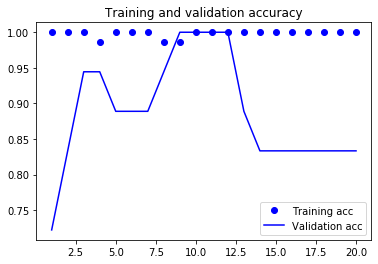

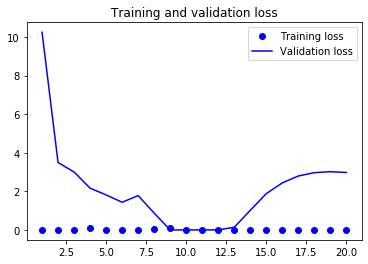

In [105]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

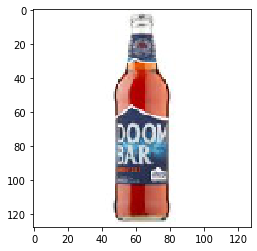

(1, 128, 128, 3)


In [111]:
img_path = r'C:\Users\kasandeep\Desktop\Projects_S\Vinod_Classification\Groups\591560\131641.jpg'

img = image.load_img(img_path, target_size=(128, 128))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

plt.imshow(img_tensor[0])
plt.show()

print(img_tensor.shape)

# Predict new Image

In [ ]:
Going to read training images
Now going to read 589708 files (Index: 0)
Now going to read 589924 files (Index: 1)
Now going to read 590108 files (Index: 2)
Now going to read 591560 files (Index: 3)
Now going to read No_class files (Index: 4)


In [41]:
if os.path.exists(r'C:\Users\kasandeep\Desktop\Projects_S\Vinod_Classification\Groups\589708/'):
            print(True)

True


In [21]:
from keras.models import load_model
model=load_model('5class_cnn.hdf5')

In [15]:
import os

In [25]:
path=r'C:\Users\kasandeep\Desktop\Projects_S\Vinod_Classification\T2\G1/'

In [70]:
model=model

In [161]:
for j in os.listdir(path):
    try:
        img = image.load_img(path+j, target_size=(128, 128))
        img = np.multiply(img, 1.0 / 255.0)
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)

        images = np.vstack([x])
        classes = model.predict_classes(images)
        print(j)
        for i in classes:
            if i==0:
                print("Predicted class is: 514507")
                if not os.path.exists(path+'514507'):
                    os.makedirs(path+'514507')
                else:
                    shutil.copy(path+j,path+'514507')
                    print('File Moved')       
            if i==1:
                print("Predicted class is: 514607")
                if not os.path.exists(path+'514607'):
                    os.makedirs(path+'514607')
                else:
                    shutil.copy(path+j,path+'514607')
                    print('File Moved')    
            if i==2:
                print("Predicted class is: 515551")
                if not os.path.exists(path+'515551'):
                    os.makedirs(path+'515551')
                else:
                    shutil.copy(path+j,path+'515551')
                    print('File Moved')  
            if i==3:
                print("Predicted class is: 521094")
                if not os.path.exists(path+'521094'):
                    os.makedirs(path+'521094')
                else:
                    shutil.copy(path+j,path+'521094')
                    print('File Moved')  
            if i==4:
                print('Predicted class is: 522369')
                if not os.path.exists(path+'522369'):
                    os.makedirs(path+'522369')
                else:
                    shutil.copy(path+j,path+'522369')
                    print('File Moved') 
            if i==5:
                print('Predicted class is: 542231')
                if not os.path.exists(path+'542231'):
                    os.makedirs(path+'542231')
                else:
                    shutil.copy(path+j,path+'542231')
                    print('File Moved') 
            if i==6:
                print('Predicted class is: 542241')
                if not os.path.exists(path+'542241'):
                    os.makedirs(path+'542241')
                else:
                    shutil.copy(path+j,path+'542241')
                    print('File Moved') 
            if i==7:
                print('Predicted class is: 542252')
                if not os.path.exists(path+'542252'):
                    os.makedirs(path+'542252')
                else:
                    shutil.copy(path+j,path+'542252')
                    print('File Moved') 
            if i==8:
                print('Predicted class is: 543488')
                if not os.path.exists(path+'543488'):
                    os.makedirs(path+'543488')
                else:
                    shutil.copy(path+j,path+'543488')
                    print('File Moved') 
            if i==9:
                print('Predicted class is: 543493')
                if not os.path.exists(path+'543493'):
                    os.makedirs(path+'543493')
                else:
                    shutil.copy(path+j,path+'543493')
                    print('File Moved') 
    except:
            pass


In [ ]:
#After Removing Batch_Normalization

10170259.jpg
Predicted class is: 515551
File Moved
10212643.jpg
Predicted class is: 522369
File Moved
10331715.jpg
Predicted class is: 514607
File Moved
10331729.jpg
Predicted class is: 514607
File Moved
1278866.jpeg
Predicted class is: 515551
File Moved
197034.jpeg
Predicted class is: 515551
File Moved
242124.jpg
Predicted class is: 522369
File Moved
8239006.jpg
Predicted class is: 521094
File Moved
8240104.jpg
Predicted class is: 522369
File Moved
9604433.jpg
Predicted class is: 542231
File Moved


#Only CNN with 10 classes

10170259.jpg
Predicted class is: 543488
File Moved
10212643.jpg
Predicted class is: 542241
File Moved
10331715.jpg
Predicted class is: 542252
File Moved
10331729.jpg
Predicted class is: 542252
File Moved
1278866.jpeg
Predicted class is: 542252
File Moved
197034.jpeg
Predicted class is: 542252
File Moved
242124.jpg
Predicted class is: 542252
File Moved
8239006.jpg
Predicted class is: 542252
File Moved
8240104.jpg
Predicted class is: 542252
File Moved
9604433.jpg
Predicted class is: 542252
File Moved


In [32]:
import os
import numpy as np
from keras.preprocessing import image
import shutil
import sys

from keras.models import load_model
#model=load_model('5class_cnn.hdf5')

path=sys.argv[0]

for j in os.listdir(path):
    try:
        img = image.load_img(path+j, target_size=(128, 128))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)

        images = np.vstack([x])
        classes = model.predict_classes(images)
        print(j)
        for i in classes:
            if i==0:
                print("Predicted class is: 514507")
                if not os.path.exists(path+'514507'):
                    os.makedirs(path+'514507')
                else:
                    shutil.copy(path+j,path+'514507')
                    print('File Moved')       
            if i==1:
                print("Predicted class is: 514607")
                if not os.path.exists(path+'514607'):
                    os.makedirs(path+'514607')
                else:
                    shutil.copy(path+j,path+'514607')
                    print('File Moved')    
            if i==2:
                print("Predicted class is: 515551")
                if not os.path.exists(path+'515551'):
                    os.makedirs(path+'515551')
                else:
                    shutil.copy(path+j,path+'515551')
                    print('File Moved')  
            if i==3:
                print("Predicted class is: 521094")
                if not os.path.exists(path+'521094'):
                    os.makedirs(path+'521094')
                else:
                    shutil.copy(path+j,path+'521094')
                    print('File Moved')  
            if i==4:
                print('Predicted class is: 522369')
                if not os.path.exists(path+'522369'):
                    os.makedirs(path+'522369')
                else:
                    shutil.copy(path+j,path+'522369')
                    print('File Moved') 
            if i==4:
                print('Predicted class is: 542231')
                if not os.path.exists(path+'542231'):
                    os.makedirs(path+'542231')
                else:
                    shutil.copy(path+j,path+'542231')
                    print('File Moved') 
            if i==4:
                print('Predicted class is: 542241')
                if not os.path.exists(path+'542241'):
                    os.makedirs(path+'542241')
                else:
                    shutil.copy(path+j,path+'542241')
                    print('File Moved') 
            if i==4:
                print('Predicted class is: 542252')
                if not os.path.exists(path+'542252'):
                    os.makedirs(path+'542252')
                else:
                    shutil.copy(path+j,path+'542252')
                    print('File Moved') 
            if i==4:
                print('Predicted class is: 543488')
                if not os.path.exists(path+'543488'):
                    os.makedirs(path+'543488')
                else:
                    shutil.copy(path+j,path+'543488')
                    print('File Moved') 
            if i==4:
                print('Predicted class is: 543493')
                if not os.path.exists(path+'543493'):
                    os.makedirs(path+'543493')
                else:
                    shutil.copy(path+j,path+'543493')
                    print('File Moved') 
    except:
        continue



NotADirectoryError: [WinError 267] The directory name is invalid: 'C:\\Users\\kasandeep\\AppData\\Local\\Continuum\\anaconda3\\lib\\site-packages\\ipykernel_launcher.py'

In [11]:
for i in os.listdir(r'C:/Users/kasandeep/Desktop/Projects_S/Vinod_Classification/Images_Testing/'):
    img = image.load_img(r'C:/Users/kasandeep/Desktop/Projects_S/Vinod_Classification/Images_Testing/'+i, target_size=(128, 128))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict_classes(images)
    print("Predicted class is:",classes)

Predicted class is: [4]
Predicted class is: [4]
Predicted class is: [1]
Predicted class is: [4]
Predicted class is: [1]
Predicted class is: [1]
Predicted class is: [1]
Predicted class is: [4]
Predicted class is: [4]
Predicted class is: [1]
Predicted class is: [1]
Predicted class is: [1]
Predicted class is: [1]
Predicted class is: [1]
Predicted class is: [4]
Predicted class is: [1]
Predicted class is: [1]
Predicted class is: [1]
Predicted class is: [4]
Predicted class is: [1]
Predicted class is: [1]
Predicted class is: [1]
Predicted class is: [1]
Predicted class is: [1]
Predicted class is: [1]
Predicted class is: [1]
Predicted class is: [4]
Predicted class is: [1]
Predicted class is: [1]
Predicted class is: [1]
Predicted class is: [1]
Predicted class is: [1]
Predicted class is: [1]
Predicted class is: [1]
Predicted class is: [1]
Predicted class is: [1]
Predicted class is: [1]
Predicted class is: [4]
Predicted class is: [1]
Predicted class is: [1]
Predicted class is: [4]
Predicted class 

OSError: cannot identify image file 'C:/Users/kasandeep/Desktop/Projects_S/Vinod_Classification/Images_Testing/Thumbs.db'

# Visualising the Features

In [108]:
layer_outputs = [layer.output for layer in model.layers[:12]]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(img_tensor)
first_layer_activation = activations[0]
print(first_layer_activation.shape)
plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')

NameError: name 'img_tensor' is not defined

In [ ]:
layer_names = []
for layer in classifier.layers[:12]:
    layer_names.append(layer.name) # Names of the layers, so you can have them as part of your plot
    
images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations): # Displays the feature maps
    n_features = layer_activation.shape[-1] # Number of features in the feature map
    size = layer_activation.shape[1] #The feature map has shape (1, size, size, n_features).
    n_cols = n_features // images_per_row # Tiles the activation channels in this matrix
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols): # Tiles each filter into a big horizontal grid
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            channel_image -= channel_image.mean() # Post-processes the feature to make it visually palatable
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, # Displays the grid
                         row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

# Single Images

In [48]:
import cv2
from skimage import measure

In [ ]:
img = cv2.imread(r'C:\Users\kasandeep\Desktop\Projects_S\PetCare\PetCare_21Nov2019_reults\2c_0_29\9854946.jpg')
img_2 = cv2.imread(r'C:\Users\kasandeep\Desktop\Projects_S\PetCare\PetCare_21Nov2019_reults\2c_0_29\9854958.jpg')

if measure.compare_ssim(img, img_2,multichannel=True)>0.65:
    print(True)

In [65]:
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
import numpy as np
from sklearn.cluster import KMeans
import os, shutil, glob, os.path
from PIL import Image as pil_image
image.LOAD_TRUNCATED_IMAGES = True 
model = VGG16(weights='imagenet', include_top=False)

# Variables
imdir = r'C:\Users\kasandeep\Desktop\Projects_S\Vinod_Classification\Training_Data\New folder\Singles'
targetdir = r"C:\Users\kasandeep\Desktop\Projects_S\Vinod_Classification\Training_Data\New folder\Singles/60"
number_clusters = 3

# Loop over files and get features
filelist = glob.glob(os.path.join(imdir, '*.jpg'))
filelist.sort()
featurelist = []
for i, imagepath in enumerate(filelist):
    try:
        print("    Status: %s / %s" %(i, len(filelist)), end="\r")
        img = image.load_img(imagepath, target_size=(224, 224))
        img_data = image.img_to_array(img)
        img_data = np.expand_dims(img_data, axis=0)
        img_data = preprocess_input(img_data)
        features = np.array(model.predict(img_data))
        featurelist.append(features.flatten())
    except:
        continue

# Clustering
kmeans = KMeans(n_clusters=number_clusters, random_state=0).fit(np.array(featurelist))

# Copy images renamed by cluster 
# Check if target dir exists
os.makedirs(targetdir)

# Copy with cluster name
print("\n")
for i, m in enumerate(kmeans.labels_):
    print("    Copy: %s / %s" %(i, len(kmeans.labels_)), end="\r")
    shutil.copy(filelist[i], targetdir + str(m) + "_" + str(i) + ".jpg")

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'C:\\Users\\kasandeep\\Desktop\\Projects_S\\Vinod_Classification\\Training_Data\\New folder\\Singles/60'

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline 

In [56]:
distortions = []
K = range(1,100)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(np.array(featurelist))
    distortions.append(kmeanModel.inertia_)

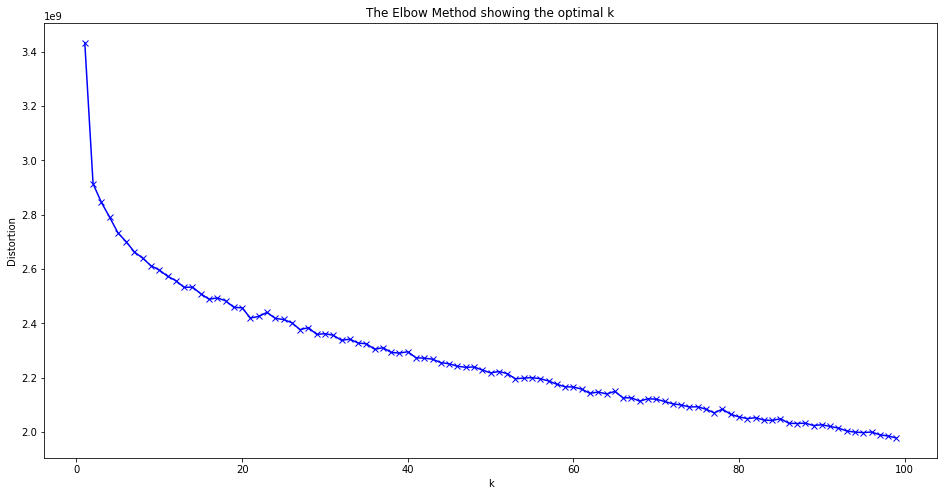

In [64]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.savefig('elbow.jpg')
plt.show()

In [62]:
plt.savefig('elbow.png',bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

In [63]:
plt.show()

In [132]:
import os
import shutil
import glob

def recursive_copy_files(source_path, destination_path, override=False):
    files_count = 0
    if not os.path.exists(destination_path):
        os.mkdir(destination_path)
    items = glob.glob(source_path + '/*')
    for item in items:
        #print(item)
        if os.path.isdir(item):
            path = os.path.join(destination_path, item.split('/')[-1])
            files_count += recursive_copy_files(source_path=item, destination_path=path, override=override)
        else:
            file = os.path.join(destination_path, item.split('/')[-1])
            print(file)
            if not os.path.exists(file) or override:
                shutil.copyfile(item, file)
                files_count += 1
    return files_count

In [139]:
import umap
import hdbscan

def UMAP_reduction(data,min_dist=0.0, n_components=2, n_neighbors=3):

    umap_array = umap.UMAP(
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        n_components=n_components,
        random_state=42,).fit_transform(data)

    return umap_array

def HDBSCAN_clustering(data,min_samples=1,min_cluster_size=10):

    labels = hdbscan.HDBSCAN(min_samples=min_samples,min_cluster_size=min_cluster_size,).fit_predict(data)

    return labels


In [140]:
def UMAP_reduction2(data,min_dist=0.0, n_components=2, n_neighbors=3):

    umap_array = umap.UMAP(
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        n_components=n_components,
        random_state=42,).fit(data)

    return umap_array
umap_array1 = UMAP_reduction2(image_embeddings)

C:\Users\kasandeep\Desktop\Projects_S\Vinod_Classification\umap\spectral.py:243: UserWarning: Embedding a total of 4 separate connected components using meta-embedding (experimental)
  n_components


In [141]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
import numpy as np
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
model = ResNet50(weights='imagenet',include_top=False,pooling = 'avg')

#model_vgg16 = VGG16(weights='imagenet', include_top=False)

def ExtractImageFeature(img):
    try:
        image = load_img(img, target_size=(224, 224))
        x = img_to_array(image)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        features = model.predict(x)
        flat_features = features.flatten()
        return flat_features
    except:
        pass

In [87]:
# import os
# import shutil
# import glob

# def recursive_copy_files(source_path, destination_path, override=False):
#     files_count = 0
#     if not os.path.exists(destination_path):
#         os.mkdir(destination_path)
#     items = glob.glob(source_path + '/*')
#     for item in items:
#         #print(item)
#         if os.path.isdir(item):
#             path = os.path.join(destination_path, item.split('/')[-1])
#             files_count += recursive_copy_files(source_path=item, destination_path=path, override=override)
#         else:
#             file = os.path.join(destination_path, item.split('/')[-1])
#             print(file)
#             if not os.path.exists(file) or override:
#                 shutil.copyfile(item, file)
#                 files_count += 1
#     return files_count

In [128]:
path3=r"C:\Users\kasandeep\Desktop\Projects_S\Vinod_Classification\T3\single/"

In [142]:
import os
import numpy as np
import pandas as pd
import glob2
import bs4


# DEPENDENCY
directory_of_images = path3
image_type = 'g'

# Find all images
relative_image_directory = directory_of_images

all_imgs = [(relative_image_directory + x) for x in os.listdir(relative_image_directory) if image_type in x]
all_imgs.sort()
raw_paths = [x.split('/')[-1] for x in all_imgs]

# Get features from VGG16
feature_lists = [ExtractImageFeature(img) for img in all_imgs]
image_embeddings = np.array(feature_lists)

# Reduce dimensions and find cluster labels
umap_array = UMAP_reduction(image_embeddings)
cluster_labels = HDBSCAN_clustering(umap_array)

# Get dataframe of results
df_data = pd.DataFrame({'URL': raw_paths,'X': umap_array[:,0],'Y': umap_array[:,1],'labels':cluster_labels})

length_before_outliers = len(df_data)
df_data = df_data[np.abs(df_data.X - df_data.X.mean()) <= (2 * df_data.X.std())]
df_data = df_data[np.abs(df_data.Y - df_data.Y.mean()) <= (2 * df_data.Y.std())]
print('Number of outliers removed: {}'.format(length_before_outliers-len(df_data)))


print(cluster_labels)

# targetdir= r"C:\Users\kasandeep\Desktop\Projects_S\Vinod_Classification\Training_Data\New folder\Singles\New folder/"

# for i, m in enumerate(cluster_labels):
#     print("    Copy: %s / %s" %(i, len(cluster_labels)), end="\r")
#     shutil.copy(all_imgs[i], targetdir + str(m) + "_" + str(i) + ".jpg")

# # Save data and visualisation
# visualisation_path = '{}/visualisations/'.format(directory_of_images)

# if not os.path.exists(visualisation_path):
#     os.makedirs(visualisation_path)

# df_data.to_csv('{}data.csv'.format(visualisation_path))

# # Load and create index.html file
# with open(visualisation_path+"/main/imaged3.html") as inf:
#     txt = inf.read()
#     soup = bs4.BeautifulSoup(txt, "html.parser")

# with open("{}index.html".format(visualisation_path), "w") as outf:
#     outf.write(str(soup))

# recursive_copy_files(relative_image_directory, '{}images/'.format(visualisation_path))

C:\Users\kasandeep\Desktop\Projects_S\Vinod_Classification\umap\spectral.py:243: UserWarning: Embedding a total of 4 separate connected components using meta-embedding (experimental)
  n_components


Number of outliers removed: 4
[ 2  0  0  2  1  1  2  0  0  2  3  1  1  2  1  0 -1  1  1  3  1  3  2  1
  0  2  1  1  1  2  1  1  0  2  3  0  0  3  3  3  1  1 -1  2  3  1  3  1
  1  2  0  1  1  1  1  1  2  3  1  1  1  1  1  1  0 -1  3 -1  3  3]


In [1]:
import umap

In [2]:
import umap.plot

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


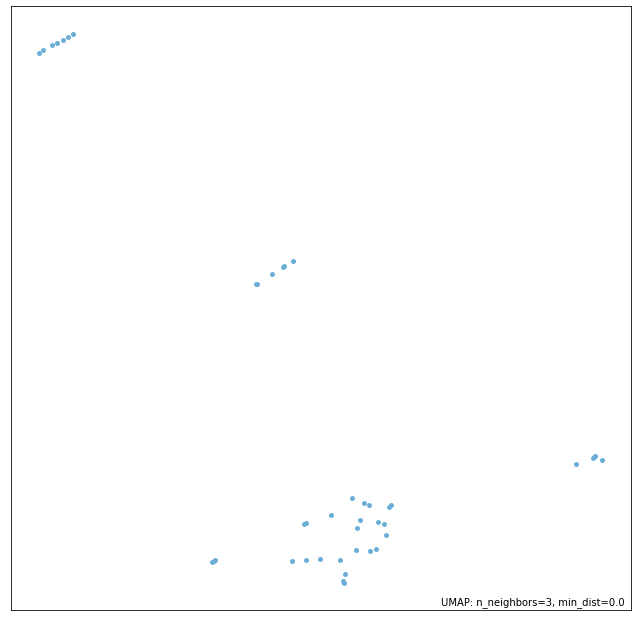

In [13]:
umap.plot.points(umap_array1)

In [143]:
for i in set(cluster_labels):
    os.makedirs(path3+str(i),exist_ok=True)
for z in range(len(set(cluster_labels))):
    for i,j in zip(all_imgs,cluster_labels):
        if j==list(set(cluster_labels))[z]:
            shutil.copy(i,path3+str(j))

In [63]:
#     if j==0:
#         shutil.copy(i,r"C:\Users\kasandeep\Desktop\Projects_S\Vinod_Classification\Training_Data\New folder\Singles\New folder/"+str(0))
#     elif j==1:
#         shutil.copy(i,r"C:\Users\kasandeep\Desktop\Projects_S\Vinod_Classification\Training_Data\New folder\Singles\New folder/"+str(1))
#     else j==2:
#         shutil.copy(i,r"C:\Users\kasandeep\Desktop\Projects_S\Vinod_Classification\Training_Data\New folder\Singles\New folder/"+str(2))

True


# Visualisation

In [93]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.cluster as cluster
import time
%matplotlib inline
sns.set_context('poster')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.25, 's' : 80, 'linewidths':0}

In [12]:
train_path=r'C:\Users\kasandeep\Desktop\Projects_S\Vinod_Classification\T3\G1'
image_size=128
classes=os.listdir(train_path)
def load_train(train_path, image_size, classes):
    images = []
    labels = []
    img_names = []
    field=[]
    indexes=[]
    print('Going to read training images')
    for fields in classes:   
        index = classes.index(fields)
        print('Now going to read {} files (Index: {})'.format(fields, index))
        path = os.path.join(train_path, fields, '*g')
        files = glob.glob(path)
        for fl in files:
            try:
                image = cv2.imread(fl)
                image = cv2.resize(image, (image_size, image_size),0,0, cv2.INTER_LINEAR)
                image = image.astype(np.float32)
                #image = np.multiply(image, 1.0 / 255.0)
                images.append(image)
                label = np.zeros(len(classes))
                label[index] = 1.0
                labels.append(label)
                flbase = os.path.basename(fl)
                img_names.append(flbase)
            except:
                continue
    images = np.array(images)
    labels = np.array(labels)
    img_names = np.array(img_names)

    return images, labels, img_names,field,indexes
images, labels, img_names,field,indexes = load_train(train_path, image_size, classes)
images, labels, img_names = shuffle(images, labels, img_names) 
x_train,x_test,y_train,y_test=train_test_split(images,labels, test_size=0.33)
x_train = x_train.reshape(x_train.shape[0], 128, 128, 3)
x_test = x_test.reshape(x_test.shape[0], 128, 128, 3) 

Going to read training images
Now going to read 514507 files (Index: 0)
Now going to read 514607 files (Index: 1)
Now going to read 515551 files (Index: 2)
Now going to read 521094 files (Index: 3)
Now going to read 522369 files (Index: 4)
Now going to read 542231 files (Index: 5)
Now going to read 542241 files (Index: 6)
Now going to read 542252 files (Index: 7)
Now going to read 543488 files (Index: 8)
Now going to read 543493 files (Index: 9)


In [20]:
import cv2 as cv

im = cv.imread(r'C:\Users\kasandeep\Desktop\Projects_S\Vinod_Classification\T3\G1\514507/58452_GaussianNoise.jpg')

thumbnail = cv.resize(im, (128,128), interpolation = cv.INTER_AREA)

cv.imshow('exampleshq', thumbnail)
cv.waitKey(0)
cv.destroyAllWindows()

In [15]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(128,128,3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [17]:
model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [18]:
history = model.fit(x_train,y_train,
                                   epochs = 50,
                                   validation_split = 0.2,)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Train on 504 samples, validate on 127 samples
Epoch 1/50





504/504 [==============================] - 23s 45ms/step - loss: 15.1207 - acc: 0.0615 - val_loss: 15.6104 - val_acc: 0.0315
Epoch 2/50
504/504 [==============================] - 20s 39ms/step - loss: 14.9988 - acc: 0.0694 - val_loss: 15.6104 - val_acc: 0.0315
Epoch 3/50
504/504 [==============================] - 20s 40ms/step - loss: 15.0947 - acc: 0.0635 - val_loss: 15.6104 - val_acc: 0.0315
Epoch 4/50
504/504 [==============================] - 21s 41ms/step - loss: 15.0947 - acc: 0.0635 - val_loss: 15.6104 - val_acc: 0.0315
Epoch 5/50
384/504 [=====================>........] - ETA: 5s - loss: 15.2786 - acc: 0.0521

KeyboardInterrupt: 

In [ ]:
# visualize feature maps output from each block in the vgg model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import Model
from matplotlib import pyplot
from numpy import expand_dims
# load the model
model = model
# redefine model to output right after the first hidden layer
ixs = [2, 5, 9, 13, 17]
outputs = [model.layers[i].output for i in ixs]
model = Model(inputs=model.inputs, outputs=outputs)
# load the image with the required shape
img = load_img('bird.jpg', target_size=(224, 224))
# convert the image to an array
img = img_to_array(img)
# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)
# prepare the image (e.g. scale pixel values for the vgg)
img = preprocess_input(img)
# get feature map for first hidden layer
feature_maps = model.predict(img)
# plot the output from each block
square = 8
for fmap in feature_maps:
	# plot all 64 maps in an 8x8 squares
	ix = 1
	for _ in range(square):
		for _ in range(square):
			# specify subplot and turn of axis
			ax = pyplot.subplot(square, square, ix)
			ax.set_xticks([])
			ax.set_yticks([])
			# plot filter channel in grayscale
			pyplot.imshow(fmap[0, :, :, ix-1], cmap='gray')
			ix += 1
	# show the figure
	pyplot.show()